# Python for Finance - part 5

#### 금융분석과 관련된 기본적인 내용을 정리하였습니다. 파이썬을 활용한 금융분석 (이브 힐피시 지음)을 참고하였습니다.

## Chapter 9. 수학용 도구
#### 근사법 : 금융 분야에서 가장 흔히 사용되는 수치 방법 중의 하나인 회귀법과 보간법
#### 최적화 : 많은 금융 분야(EX. 옵션 가격 계산 시 모형 캘리브레이션과 관련)에서 최적화 도구를 필요로 함
#### 적분 : 금융 파생상품의 가치 평가는 대부분 적분 계산으로 귀결
#### 심볼릭 연산 : 파이썬은 SymPy라는 연립방정식 계산 등이 가능한 강력한 심볼릭 연산 도구 제공

### 9.1 근사화

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

Text(0, 0.5, 'f(x)')

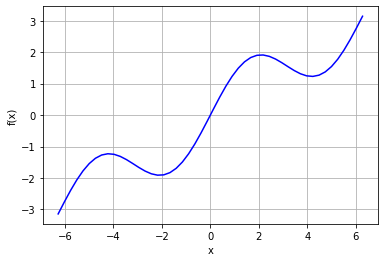

In [4]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

#### 9.1.1 회귀법
#### 효율적으로 일차원뿐만 아니라 다차원 함수의 근사도 가능
#### 단항식 기저 함수 -> x, x^2, x^3 등 활용

In [5]:
reg = np.polyfit(x, f(x), deg=1) #### 선형회귀
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

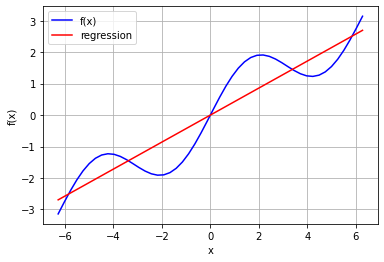

In [7]:
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

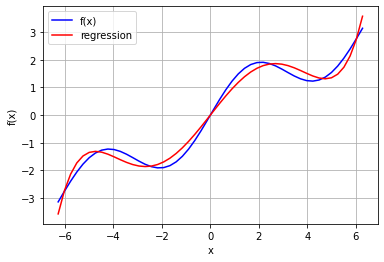

In [8]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

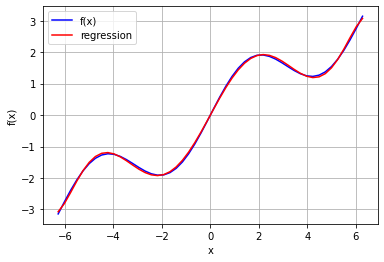

In [9]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

In [10]:
np.allclose(f(x), ry)

False

In [11]:
np.sum((f(x) - ry) **2) / len(x)

0.0017769134759517624

#### 개별 기저 함수 : 근사화하고자 하는 함수에 대해 알고 있는 지식을 활용하여 적합한 기저 함수 활용

In [15]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x **3
matrix[2, :] = x **2
matrix[1, :] = x
matrix[0, :] = 1

reg = np.linalg.lstsq(matrix.T, f(x))[0]

reg

c:\py_workplace\jupyter\venv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


array([-9.13644887e-17,  5.62777448e-01, -1.33226763e-15, -5.43553615e-03])

Text(0, 0.5, 'f(x)')

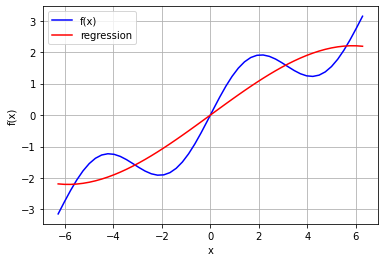

In [16]:
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

c:\py_workplace\jupyter\venv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


Text(0, 0.5, 'f(x)')

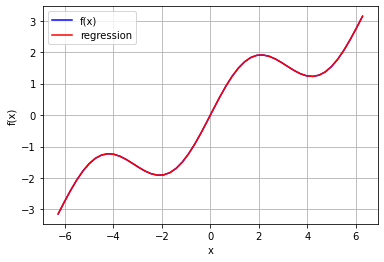

In [17]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = np.sin(x)
matrix[2, :] = x **2
matrix[1, :] = x
matrix[0, :] = 1

reg = np.linalg.lstsq(matrix.T, f(x))[0]

ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r', label = 'regression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

#### 잡음이 있는 자료

Text(0, 0.5, 'f(x)')

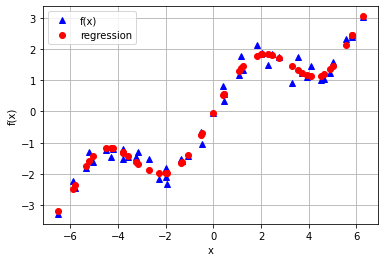

In [18]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

plt.plot(xn, yn, 'b^', label = 'f(x)')
plt.plot(xn, ry, 'ro', label = 'regression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

#### 정렬되지 않은 자료

Text(0, 0.5, 'f(x)')

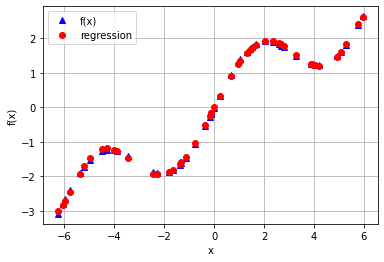

In [19]:
xu = np.random.rand(50) * 4* np.pi -2 * np.pi
yu = f(xu)

reg = np.polyfit(xu, yu, 7)
ry = np.polyval(reg, xu)

plt.plot(xu, yu, 'b^', label = 'f(x)')
plt.plot(xu, ry, 'ro', label = 'regression')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

#### 다차원 자료

In [21]:
def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [22]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
Z = fm(X, Y)
x = X.flatten()
y = Y.flatten()

#### 9.1.2 보간법
#### x차원의 정렬된 관측점이 주어졌을 때 두 개의 이웃하는 관측점 사이의 자료를 계산하는 보간 함수를 만드는 것
#### 보간 함수 : 관측점 자체도 정확하게 재현 + 각 관측 점에서 연속 미분 가능한 함수 -> 3차 이상(큐빅 스플라인)

In [3]:
import scipy.interpolate as spi
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

Text(0, 0.5, 'f(x)')

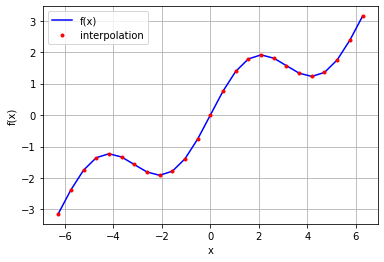

In [5]:
def f(x):
    return np.sin(x) + 0.5 * x


ipo = spi.splrep(x, f(x), k =1)
iy = spi.splev(x, ipo)

plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, iy, 'r.', label = 'interpolation')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

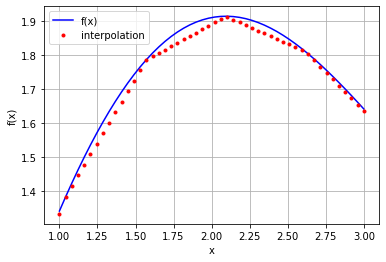

In [6]:
xd = np.linspace(1., 3., 50)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label = 'f(x)')
plt.plot(xd, iyd, 'r.', label = 'interpolation')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

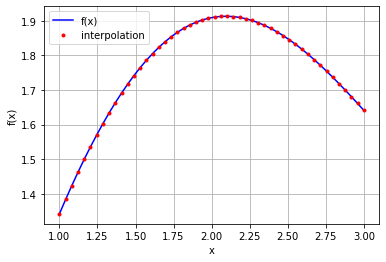

In [7]:
ipo = spi.splrep(x, f(x), k =3)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label = 'f(x)')
plt.plot(xd, iyd, 'r.', label = 'interpolation')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')

### 9.2 최적화

In [8]:
def fm(x,y):
    return (np.sin(x) + 0.05*x**2 + np.sin(y) + 0.05*y**2) 

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm(X,Y)

In [9]:
import scipy.optimize as spo

#### 9.2.1 전역 최적화

In [14]:
def fo(x,y):
    z = np.sin(x) + 0.05*x**2 + np.sin(y) + 0.05*y**2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

In [17]:
output = True
spo.brute(fo, ranges = ((-10, 10.1, 5), (-10, 10.1, 5)), finish = None)

TypeError: fo() missing 1 required positional argument: 'y'

#### 9.2.2 국소 최적화

#### 9.2.3 제약 조건이 있는 최적화

In [20]:
from math import sqrt

#### 최소화 하려는 함수
def Eu(s, b):
    return -(.5 * sqrt(s*15+b*5)+.5*sqrt(s*5+b*12))

#### 제약 조건
cons = ({'type' : 'ineq', 'fun' : lambda s, b: 100 - s*10 - b*10})
#### 예산 제한
bnds = ((0, 1000), (0, 1000))

result = spo.minimize(Eu, ([5,5]), method='SLSQP', bounds=bnds, constraints=cons)
result

TypeError: <lambda>() missing 1 required positional argument: 'b'

### 9.3 정적분

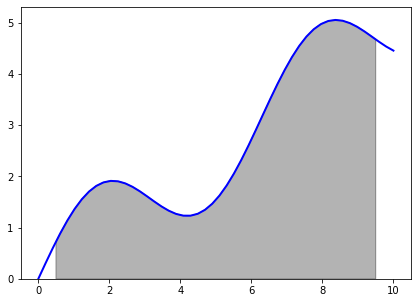

In [21]:
import scipy.integrate as sci

def f(x):
    return np.sin(x) + 0.5*x

a = 0.5
b = 9.5
x = np.linspace(0, 10)
y = f(x)

from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

Ix = np.linspace(a,b)
Iy = f(Ix)
verts = [(a,0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

#### 9.3.1 수치적분

In [22]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [23]:
sci.quad(f, a, b)[0]

24.374754718086752

In [24]:
sci.romberg(f, a, b)

24.374754718086713

In [25]:
xi = np.linspace(0.5, 9.5, 25)
sci.trapz(f(xi), xi)

24.352733271544516

In [26]:
sci.simps(f(xi), xi)

24.37496418455075

#### 9.3.2 시뮬레이션을 사용한 적분 계산

In [27]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b-a) + a
    print(np.sum(f(x)) / len(x) * (b-a)) 

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


### 9.4 심볼릭 연산

In [1]:
import sympy as sy

#### 9.4.1 심볼릭 연산 기초

In [2]:
x = sy.Symbol('x')
y = sy.Symbol('y')
type(x)

sympy.core.symbol.Symbol

In [13]:
sy.sqrt(x)

sqrt(x)

In [14]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [5]:
f = x ** 2 + 3  + .5 * x **2 + 3 /2
sy.simplify(f)

1.5*x**2 + 4.5

In [11]:
sy.init_printing(pretty_print=False, use_unicode=False)
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [6]:
print(sy.pretty(sy.sqrt(x) + .5))

√x + 0.5


In [6]:
pi_str = str(sy.N(sy.pi, 400000))
pi_str[:40]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\py_workplace\jupyter\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-fd245da4e872>", line 1, in <module>
    pi_str = str(sy.N(sy.pi, 400000))
  File "c:\py_workplace\jupyter\venv\lib\site-packages\sympy\core\evalf.py", line 1619, in N
    return sympify(x, rational=True).evalf(n, **options)
  File "c:\py_workplace\jupyter\venv\lib\site-packages\sympy\core\evalf.py", line 1514, in evalf
    result = evalf(self, prec + 4, options)
  File "c:\py_workplace\jupyter\venv\lib\site-packages\sympy\core\evalf.py", line 1366, in evalf
    r = rf(x, prec, options)
  File "c:\py_workplace\jupyter\venv\lib\site-packages\sympy\core\evalf.py", line 1298, in <lambda>
    Pi: lambda x, prec, options: (mpf_pi(prec), None, prec, None),
  File "c:\py_workplace\jupyter\venv\lib\site-packages\mpmath\libmp\libelefun.py", line 116, in f
    v = fixed(wp)

TypeError: object of type 'NoneType' has no len()

#### 9.4.2 방정식

In [39]:
sy.solve(x **  2 -1)

[-1, 1]

In [40]:
sy.solve(x** 2 - 1 -3)

[-2, 2]

In [41]:
sy.solve(x**3 + .5 *x **2 -1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [42]:
sy.solve(x**2 + y **2)

[{x: -I*y}, {x: I*y}]

#### 9.4.3 적분

In [9]:
a, b = sy.symbols('a b')

In [12]:
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [17]:
int_func = sy.integrate(sy.sin(x) + .5 * x, x)
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [20]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()
Fb- Fa

24.3747547180867

In [22]:
inf_func_limits = sy.integrate(sy.sin(x) + 0.5*x, (x, a,b))
print(sy.pretty(inf_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


#### 9.4.4 미분

In [23]:
int_func.diff()

0.5*x + sin(x)

In [24]:
f = (sy.sin(x) + 0.05 * x ** 2 + sy.sin(y) + 0.05 * y ** 2)

In [25]:
del_x = sy.diff(f, x)
del_x

0.1*x + cos(x)

In [26]:
del_y = sy.diff(f,y)
del_y

0.1*y + cos(y)